In [1]:
from pathlib import Path
import sys

# add .. to import path
sys.path.append(str(Path.cwd().parent))

from common import *

from matplotlib import pyplot
import pandas as pd
import seaborn as sns 

%matplotlib inline
sns.set(style="whitegrid", palette="muted", color_codes=True)

In [2]:
%load_ext autoreload
%autoreload 2

## Bubble sort

In [3]:
from algorithms.sorting.simple import bubble_sort

class BubbleBench(Benchmark):
    def setup(self, n):
        self.xs = np.random.random(n)

    def run(self):
        ys_ = bubble_sort(self.xs, 0, len(self.xs) - 1)

bubble = BubbleBench()

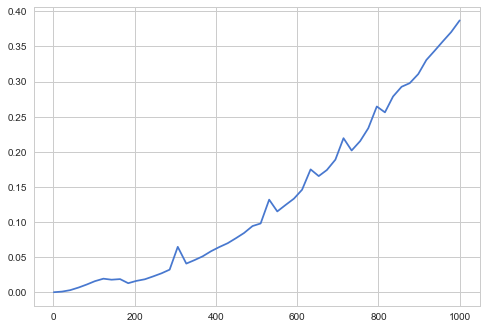

In [177]:
ns1, ys1 = time_range(bubble, 1, 1000)
pyplot.plot(ns1, ys1)

count    100.000000
mean       0.455483
std        0.083751
min        0.381706
25%        0.391639
50%        0.418442
75%        0.506055
max        0.740391
dtype: float64

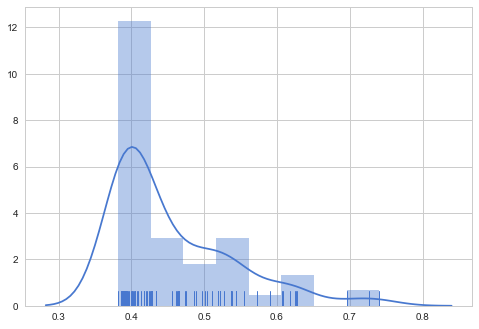

In [175]:
ys1_0 = time_dist(bubble, 1000, num=100)
    
sns.distplot(ys1_0, hist=True, rug=True)
pd.Series(ys1_0).describe()

count    100.000000
mean       0.442143
std        0.085351
min        0.377715
25%        0.384951
50%        0.394041
75%        0.479130
max        0.688150
dtype: float64

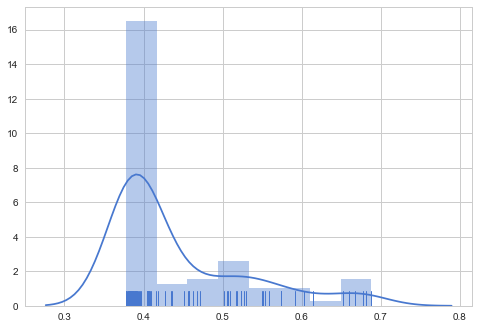

In [174]:
ys1_1 = time_dist(bubble, 1000, n_times=3)
    
sns.distplot(ys1_1, hist=True, rug=True)
pd.Series(ys1_1).describe()

Estimated Time complexity: n^2 (c = 0.003211) RSS: 0.000000


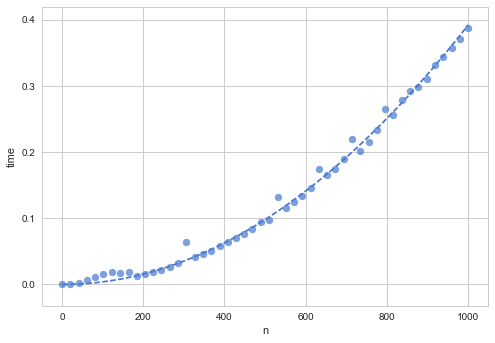

In [181]:
visualize_range_bench(ns1, ys1)

In [183]:
ns, ys = auto_bench(bubble, 15.0, range(1, 300, 1))

n0: 299
guess 0: n^2 290 0.000116
guess 1: n^2 282 0.000116
guess 2: n^2 274 0.000117
guess 3: n^2 266 0.000118
guess 4: n^2 258 0.000118
guess 5: n^2 251 0.000118
guess 6: n^2 244 0.000118
guess 7: n^2 237 0.000118
guess 8: n^2 230 0.000119
guess 9: n^2 224 0.000123
guess 10: n^2 218 0.000123
guess 11: n^2 212 0.000124
guess 12: n^2 206 0.000124
guess 13: n^2 200 0.000130
guess 14: n^2 194 0.000130
guess 15: n^2 189 0.000143
guess 16: n^2 184 0.000143
guess 17: n^2 179 0.000145
guess 18: n^2 174 0.000146
guess 19: n^2 169 0.000147
guess 20: n^2 164 0.000147
guess 21: n^2 160 0.000147
guess 22: n^2 156 0.000147
guess 23: n^2 152 0.000147
guess 24: n^2 148 0.000147
guess 25: n^2 144 0.000147
guess 26: n^2 140 0.000147
guess 27: n^2 136 0.000148
guess 28: n^2 132 0.000148
guess 29: n^2 129 0.000158
guess 30: n^2 126 0.000169
guess 31: n^2 123 0.000225
guess 32: n^2 120 0.000258
guess 33: n^2 117 0.000274
guess 34: n^2 114 0.000311
guess 35: n^2 111 0.000324
guess 36: n^2 108 0.000324
gue

## QSort

In [4]:
from algorithms.sorting.simple import quick_sort

class QSortBench(Benchmark):
    def setup(self, n):
        self.xs = np.random.random(n)

    def run(self):
        ys_ = quick_sort(self.xs, 0, len(self.xs) - 1)
        
qsort = QSortBench()

In [20]:
qsort.time(100000)

1.4063473409914877

Estimated Time complexity: n*logn (c = 0.646585) RSS: 0.000001


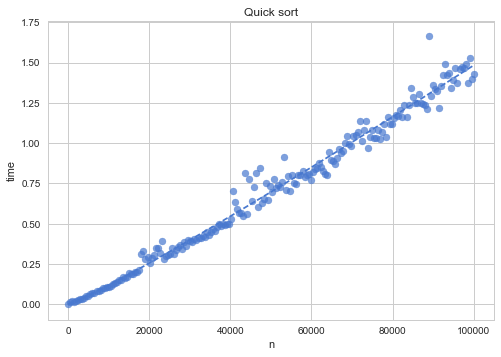

In [5]:
ns2, ys2 = time_range(qsort, 1, 100000, num=200)
visualize_range_bench(ns2, ys2)
pyplot.title('Quick sort')

## Standart Sort

In [6]:
class STDSortBench(Benchmark):
    def setup(self, n):
        self.xs = np.random.random(n)

    def run(self):
        ys_ = sorted(self.xs)
        
stdsort = STDSortBench()

Estimated Time complexity: n*logn (c = 0.000124) RSS: 0.000000


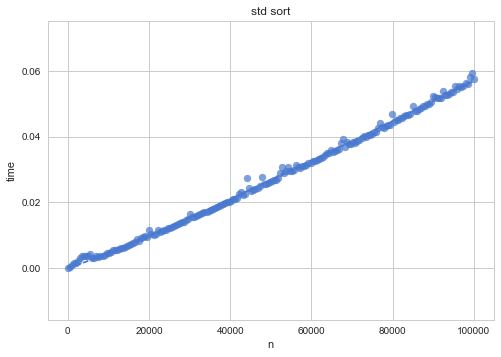

In [7]:
ns3, ys3 = time_range(stdsort, 1, 100000, num=200)
visualize_range_bench(ns3, ys3)
pyplot.title('std sort')

Estimated Time complexity: n*logn (c = 0.000124) RSS: 0.000000
Estimated Time complexity: n*logn (c = 0.646585) RSS: 0.000001


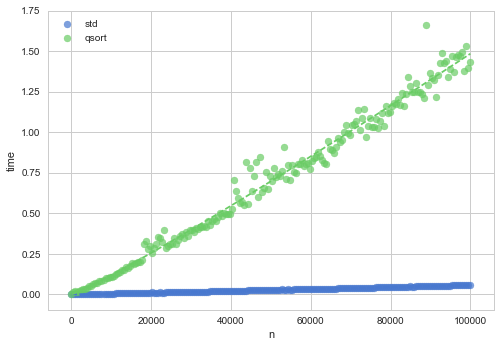

In [8]:
visualize_range_bench(ns3, ys3, label='std')
visualize_range_bench(ns2, ys2, label='qsort')
pyplot.legend()